# Demodulation of Normal AM
    -> This code is written by Syed Imaduddin

Importing all required libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

Let us define the impulse response of the filter

In [2]:
def func_filter(Vrc,trc,Tau):
  grc=Vrc*np.exp(-1*trc/Tau)
  return grc

Plot the impluse reponse of the filter

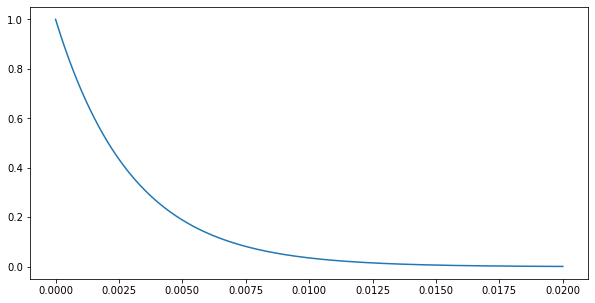

In [5]:
## ---- time-domain
fm=100
Tstart=0
Tstop=2/fm
Tstep=0.00002/fm
Tau=3/1000
t=np.arange(Tstart,Tstop,Tstep) # time
Vc0=1
rt=[]
for tc in t:
  rt.append(func_filter(Vc0,tc,Tau))
plt.figure(figsize=(10,5))
plt.plot(t,rt)

Here, we compute r(t) which presents the output of the enevlop detector.

Tc = 0.001, Tau = 0.003, Tm = 0.01


(0.0, 0.01)

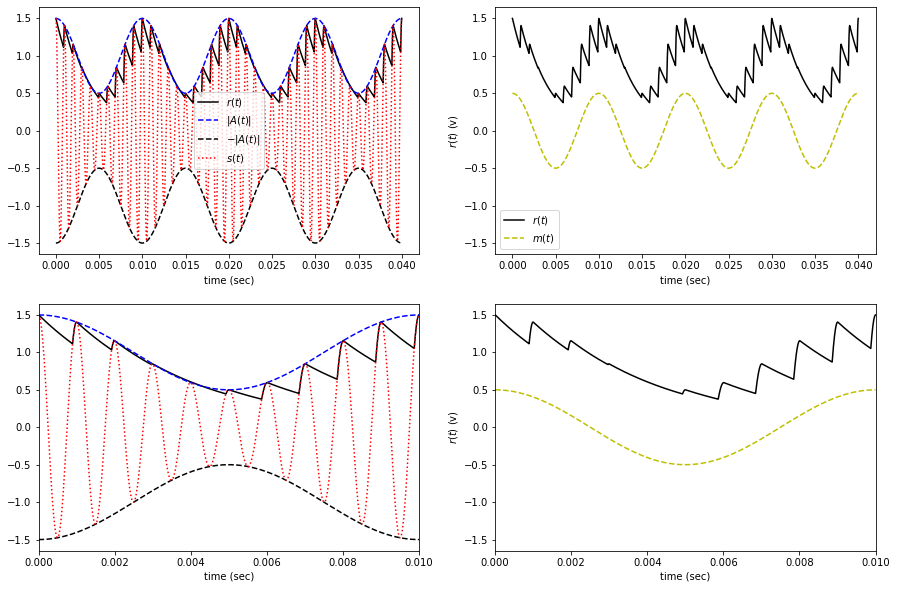

In [7]:
Am=0.5 # amplitude of message signal
fm=100 # frequency of message signal
Ac=1 # amplitude of carrier signal
fc=1000 # fequency of carrier signal
Ka=1 # amplitude sensitivity
Tau=3/1000

Tstart=0
Tstop=4/fm
Tstep=0.00002/fm

t=np.arange(Tstart,Tstop,Tstep) # time
mt=Am*np.cos(2*math.pi*fm*t) # message
ct=Ac*np.cos(2*math.pi*fc*t) # carrier
st=(1+Ka*mt)*ct # normal AM modulation
At=np.abs(Ac*(1+Ka*mt))

Vc0=st[0]
gt=func_filter(Vc0,0,Tau)
rt=[]
T=0
t1=[]
for cnt in range(len(t)):
  if st[cnt]>=gt:
    rt.append(st[cnt])
    T=t[cnt]
    Vc0=st[cnt]
    gt=st[cnt]
  else:
    t1.append(t[cnt]-T)
    rt.append(gt)
    gt=func_filter(Vc0,t[cnt]-T,Tau)

print('Tc = {}, Tau = {}, Tm = {}'.format(1/fc,Tau,1/fm))

f = plt.figure(figsize=(15,10))
ax1 = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3 = f.add_subplot(223)
ax4 = f.add_subplot(224)

ax1.plot(t,rt,'k',label='$r(t)$')
ax1.plot(t,At,'b--',label='$|A(t)|$')
ax1.plot(t,-1*At,'k--',label='$-|A(t)|$')
ax1.plot(t,st,'r:',label='$s(t)$')
ax1.set_xlabel('time (sec)')
ax1.legend()

ymin, ymax = ax1.get_ylim()
ax2.plot(t,rt,'k',label='$r(t)$')
ax2.plot(t,mt,'y--',label='$m(t)$')
ax2.set_xlabel('time (sec)')
ax2.set_ylabel('$r(t)$ (v)')
ax2.set_ylim([ymin, ymax])
ax2.legend()

ax3.plot(t,rt,'k')
ax3.plot(t,At,'b--')
ax3.plot(t,-1*At,'k--')
ax3.plot(t,st,'r:')
ax3.set_xlabel('time (sec)')
ax3.set_xlim([0, 1/fm])

ax4.plot(t,rt,'k')
ax4.plot(t,mt,'y--')
ax4.set_xlabel('time (sec)')
ax4.set_ylabel('$r(t)$ (v)')
ax4.set_ylim([ymin, ymax])
ax4.set_xlim([0, 1/fm])